In [1]:
import pandas as pd

In [2]:
# read built dataset
df = pd.read_csv('../../datasets/built_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475428 entries, 0 to 475427
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Name                    475428 non-null  object 
 1   Category Name                475428 non-null  object 
 2   Date                         475428 non-null  object 
 3   Time                         475428 non-null  object 
 4   Item Code                    475428 non-null  int64  
 5   Quantity Sold (kilo)         475428 non-null  float64
 6   Unit Selling Price (RMB/kg)  475428 non-null  float64
 7   Sale or Return               475428 non-null  object 
 8   Discount (Yes/No)            475428 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 32.6+ MB


In [3]:
# drop unnecessary columns
df = df.drop(columns=['Item Code', 'Time', 'Discount (Yes/No)'])
df.sample(2)

,Item Name,Category Name,Date,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return
263133,water chestnut,aquatic,2022-01-01,0.185,6.0,sale
76907,yunnan lettuces,flower,2021-04-02,0.395,6.6,sale


In [4]:
import numpy as np

<Axes: >

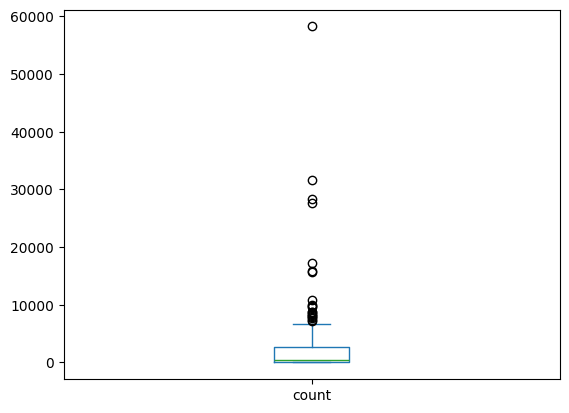

In [5]:
# visualise frequency of selling an item
df['Item Name'].value_counts().plot.box()

In [6]:
(df['Item Name'].value_counts() > 4000).sum()

33

In [7]:
# rename items with low frequency as 'Other'
filt = (df['Item Name'].value_counts() > 4000)
df['Item Name'] = np.where(filt[df['Item Name'].values], 'Other', df['Item Name'])
filt = df['Item Name'] == 'Other'
df = df.loc[~filt]

df['Item Name'].unique().shape[0]

144

<Axes: >

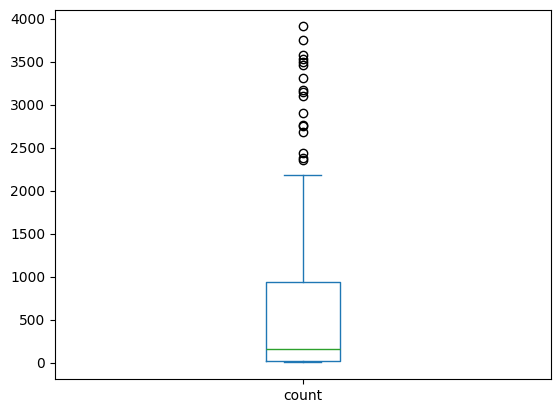

In [8]:
df['Item Name'].value_counts().plot.box()

<Axes: >

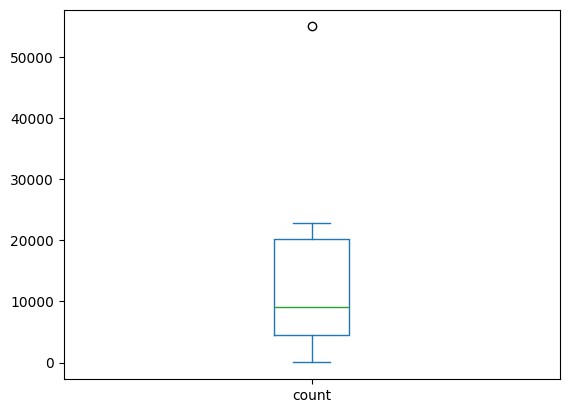

In [9]:
df['Category Name'].value_counts().plot.box()

In [10]:
# check wheather (-) values of sold amount are returned items
(df['Quantity Sold (kilo)'] < 0).sum() == (df['Sale or Return'] == 'return').sum()

True

In [11]:
# remove returned item records
filt = (df['Sale or Return'] == 'return')
df = df.loc[~filt]

df = df.drop(columns=['Sale or Return'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100034 entries, 0 to 475427
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Name                    100034 non-null  object 
 1   Category Name                100034 non-null  object 
 2   Date                         100034 non-null  object 
 3   Quantity Sold (kilo)         100034 non-null  float64
 4   Unit Selling Price (RMB/kg)  100034 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.6+ MB


In [12]:
# check if there are 0 sold amounts
(df['Quantity Sold (kilo)'] == 0).sum()

0

<Axes: >

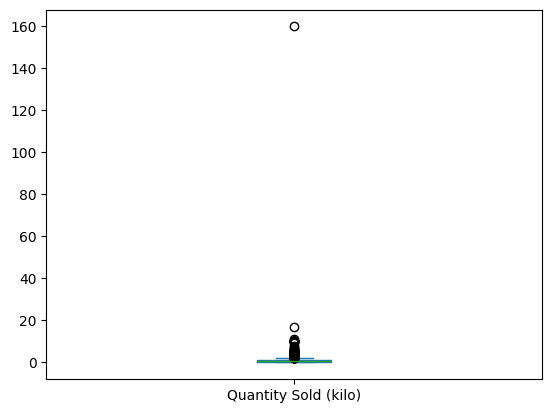

In [13]:
# visualise sold amount
df['Quantity Sold (kilo)'].plot.box()

In [14]:
np.mean(df['Quantity Sold (kilo)'])

0.6366785792830438

In [15]:
# handle outlier with mean values
df['Quantity Sold (kilo)'] = np.where(df['Quantity Sold (kilo)'] >= 160, np.mean(df['Quantity Sold (kilo)']), df['Quantity Sold (kilo)'])

# check the change of mean
np.mean(df['Quantity Sold (kilo)']), df['Quantity Sold (kilo)'].max()

(0.6350854877199682, 17.0)

<Axes: >

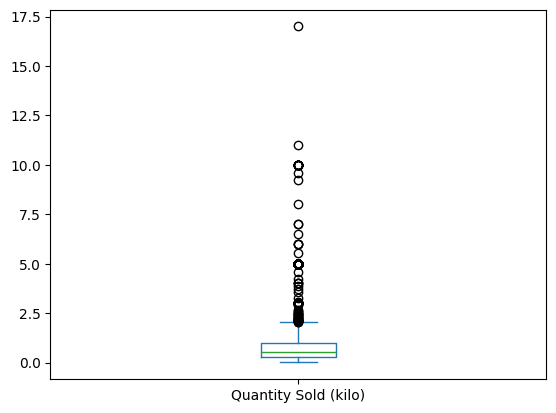

In [16]:
# visualise sold amount
df['Quantity Sold (kilo)'].plot.box()

<Axes: >

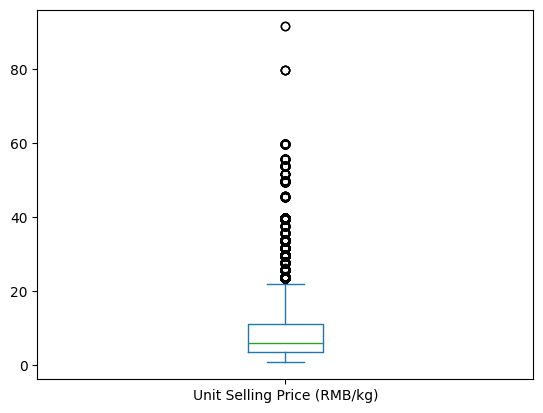

In [17]:
df['Unit Selling Price (RMB/kg)'].plot.box()

In [18]:
filt = df['Unit Selling Price (RMB/kg)'] > 40
df = df.loc[~filt]

In [19]:
# group dataset by item name, category and date
df = df.groupby(['Date', 'Item Name', 'Category Name']).mean().reset_index()
df.head(3)

,Date,Item Name,Category Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
0,2021-01-01,7 colour pepper,capsicum,0.383875,18.0
1,2021-01-01,apricot bao mushroom,mushroom,0.278333,10.0
2,2021-01-01,bell pepper,capsicum,0.260000,16.0


In [20]:
df.to_csv('../../datasets/daily_mean.csv', index=False)
df = df.drop(columns=['Date'])
df.sample(3)

,Item Name,Category Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
3946,sweet chinese cabbage,flower,0.609133,7.0
3488,green hangzhou pepper,capsicum,0.163444,6.0
1869,red hang pepper,capsicum,0.229000,14.0


<Axes: >

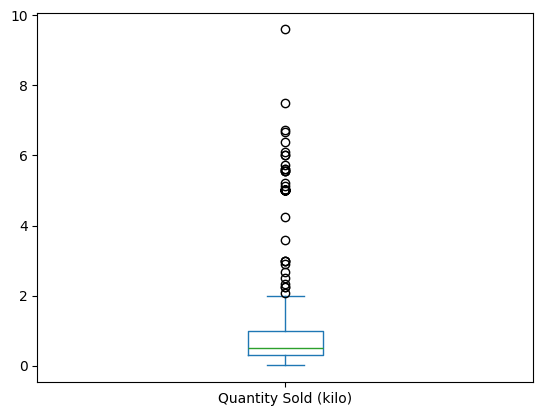

In [21]:
# visualise processed sold amount
df['Quantity Sold (kilo)'].plot.box()

<Axes: >

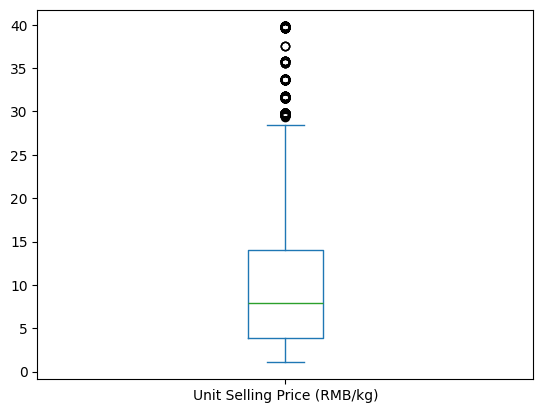

In [22]:
# visualise unit selling price
df['Unit Selling Price (RMB/kg)'].plot.box()

In [23]:
# view co-relation between price and sold amount
df.loc[:,['Unit Selling Price (RMB/kg)', 'Quantity Sold (kilo)']].corr()

,Unit Selling Price (RMB/kg),Quantity Sold (kilo)
Unit Selling Price (RMB/kg),1.00000,-0.48081
Quantity Sold (kilo),-0.48081,1.00000


<Axes: xlabel='Unit Selling Price (RMB/kg)', ylabel='Quantity Sold (kilo)'>

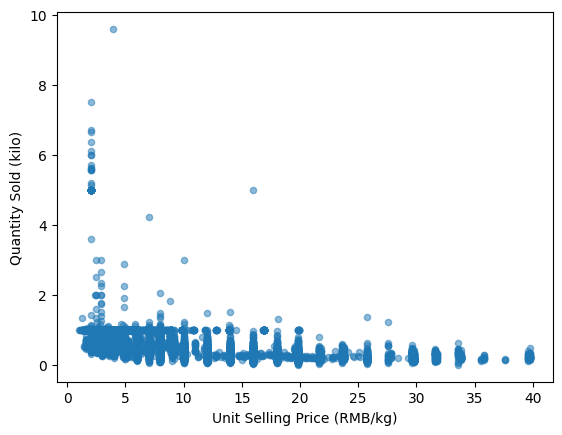

In [24]:
# visualise relation between price and sold amount
df.plot.scatter(x = 'Unit Selling Price (RMB/kg)', y = 'Quantity Sold (kilo)', alpha = 0.5)

In [25]:
# one hot encoding
df = pd.get_dummies(df)
df.shape

(11826, 151)

In [26]:
df.sample(3)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 colour pepper,Item Name_agaricus bisporus,Item Name_aihao,Item Name_amaranth,Item Name_apricot bao mushroom,Item Name_basil,Item Name_bell pepper,Item Name_big broccoli,...,Item Name_yuxingcao,Item Name_zhijiang red bolt,Item Name_zhimaxiancai,Item Name_zhuyecai,Category Name_aquatic,Category Name_cabbage,Category Name_capsicum,Category Name_flower,Category Name_mushroom,Category Name_solanum
9810,0.4283,5.2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1900,0.3380,12.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
7612,0.3460,19.8,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [27]:
# save pre-processed dataset
df.to_csv('../../datasets/pre_processed_dataset.csv', index=False)